# Part Four RasNet Model

In [1]:
import cv2 as cv2
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import optimizers, initializers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten,Dropout, MaxPooling2D, AveragePooling2D
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import EarlyStopping, History

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import import_ipynb
import dataSetUtility as dsu
import plottingUtility as pltu

importing Jupyter notebook from dataSetUtility.ipynb
importing Jupyter notebook from plottingUtility.ipynb


In [2]:
#path to the directories
pathTrain=r'C:\Users\39320\Desktop\tesi\Computer-Vision-2020-main\ImageSet\train'
pathTest=r'C:\Users\39320\Desktop\tesi\Computer-Vision-2020-main\ImageSet\test'

labels = [os.path.basename(i) for i in glob.glob(pathTrain + '/*', recursive=True)]
numberOfClasses = len(labels)
print("Class number: ", numberOfClasses)
print("Class names: ", labels)

Class number:  12
Class names:  ['171', '178_FORSE', '371', '385_FORSE', '43', '438', '619', '655', '659', '72', '96', 'Grandi']


In [3]:
xTrain, yTrain = dsu.loadImages(pathTrain, labels, dimension=128)
xTest, yTest = dsu.loadImages(pathTest, labels, dimension=128)

In [4]:
trainImagesList = []
testImagesList = []
for label in labels:
    sTrain = pathTrain+'/'+label+'/{}'
    sTest = pathTest+'/'+label+'/{}'
    tempTrain = [sTrain.format(i) for i in os.listdir(pathTrain+'/'+label+'/')]
    tempTest = [sTest.format(i) for i in os.listdir(pathTest+'/'+label+'/')]
    trainImagesList = trainImagesList + tempTrain
    testImagesList = testImagesList + tempTest

In [5]:
trainImages = []
for img in trainImagesList:
    tmp = image.load_img(img, target_size=(128,128))
    tmp = image.img_to_array(tmp)
    trainImages.append(tmp)


trainImages=np.array(trainImages)
trainImg=preprocess_input(trainImages)
trainLabelsDummy=to_categorical(yTrain,12)

In [6]:
testImages = []
for img in testImagesList:
    tmp = image.load_img(img, target_size=(128,128))
    tmp = image.img_to_array(tmp)
    testImages.append(tmp)

testImages=np.array(testImages)
testImg=preprocess_input(testImages)
testLabelsDummy=to_categorical(yTest,12)

In [7]:
#adam = optimizers.Adam()
#resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(128,128,3))
#model = Sequential()
#model.build(input_shape=(128,128,3))

#freeze all layers except the last one
#for layer in resnet50.layers[:-1]:
#    layer.trainable = False
#    model.add(layer)
#       
#model.add(Flatten())
#model.add(Dense(4096, activation='relu'))
#model.add(Dense(4096, activation='relu'))
#model.add(Dense(4096, activation='relu'))
#model.add(Dense(12, activation='softmax'))

#model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
#model.summary()

In [8]:
adam = optimizers.Adam()

In [9]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128,128,3))

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 12 classes
predictions = Dense(12, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

    
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# compile the model (should be done *after* setting layers to non-trainable)
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
earlyStopping = EarlyStopping(min_delta=0.00,patience = 5)
history = model.fit(trainImg,trainLabelsDummy,batch_size=64,
                    epochs=10,validation_split=0.15,shuffle=True,
                    callbacks=[earlyStopping])

Epoch 1/10
20/20 [==============================] - 34s 2s/step - loss: 0.5390 - accuracy: 0.8667 - val_loss: 17.3084 - val_accuracy: 0.2788
Epoch 2/10
20/20 [==============================] - 34s 2s/step - loss: 0.0371 - accuracy: 0.9875 - val_loss: 16.6810 - val_accuracy: 0.2788
Epoch 3/10
20/20 [==============================] - 36s 2s/step - loss: 0.0078 - accuracy: 0.9984 - val_loss: 18.4263 - val_accuracy: 0.2788
Epoch 4/10
20/20 [==============================] - 36s 2s/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 18.6793 - val_accuracy: 0.2788
Epoch 5/10
20/20 [==============================] - 37s 2s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 17.3985 - val_accuracy: 0.2788
Epoch 6/10
20/20 [==============================] - 38s 2s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 17.9916 - val_accuracy: 0.2788
Epoch 7/10
20/20 [==============================] - 37s 2s/step - loss: 6.7791e-04 - accuracy: 1.0000 - val_loss: 18.0391 - val_accuracy: 0.2788


In [11]:
ev = model.evaluate(testImg, testLabelsDummy)

10/10 [==============================] - 8s 786ms/step - loss: 3.0090 - accuracy: 0.8511


In [12]:
prediction = model.predict(testImg)

In [13]:
yPred = dsu.predictClass(prediction)
cm=confusion_matrix(yTest, yPred)

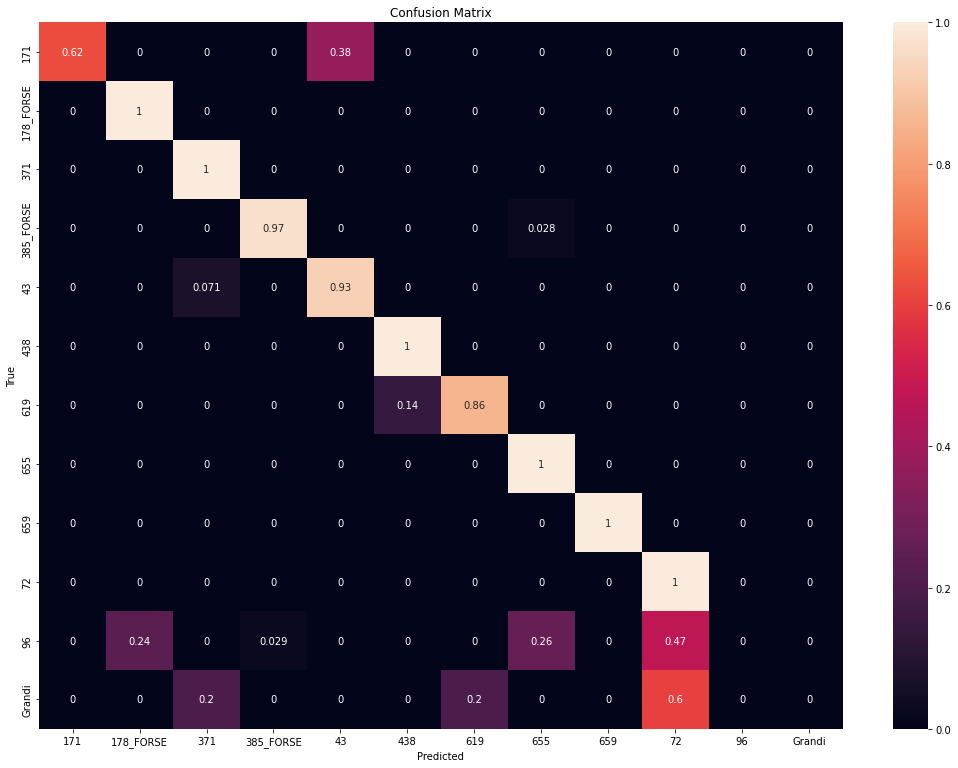

In [14]:
pltu.plotConfusionMatrix(cm, labels, "confusion_matrix_1", "images_point_four/")

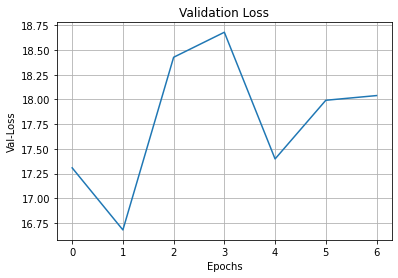

In [15]:
pltu.validationLoss(history, "images_point_four", "validation_loss_1")

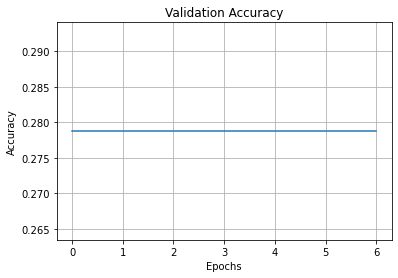

In [16]:
pltu.validationAccuracy(history, "images_point_four", "validation_acc_1")

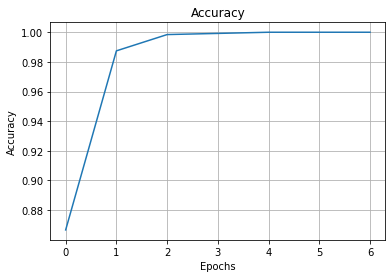

In [17]:
pltu.plottingAccuracy(history, "images_point_four", "accuracy_1")

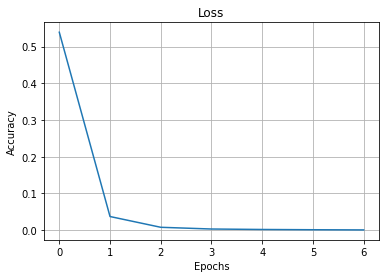

In [18]:
pltu.plottingLoss(history, "images_point_four", "loss_1")

## Employ pre-trained network

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from keras.utils import np_utils
from tensorflow.keras.applications import ResNet50, imagenet_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import GlobalAveragePooling2D

In [20]:
xTrain, yTrain = dsu.loadImages(pathTrain, labels, dimension=224)
xTest, yTest = dsu.loadImages(pathTest, labels, dimension=224)

In [21]:
yTrainDummy = to_categorical(yTrain, 12)
yTestDummy = to_categorical(yTest, 12)

In [22]:
model = ResNet50(weights='imagenet', include_top=False)
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

### Extract the features

In [23]:
def extractFeatures(model, path, labels):
    
    pathImages = []
    for label in labels:
        s = path+'/'+label+'/{}'
        temp = [s.format(i) for i in os.listdir(path+'/'+label+'/')]
        pathImages = pathImages + temp
    
    res = []
    count = 0
    for p in pathImages:
        count += 1
        img = load_img(p, target_size=(224,224))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = imagenet_utils.preprocess_input(img)
        res.append(img)
        
    images = np.vstack(res)
    features = model.predict(images, batch_size=64)
    featuresFlatten = features.reshape((features.shape[0], 7 * 7 * 2048))
    
    return images, features, featuresFlatten

In [24]:
trainImages, featureMatrix, featureArray = extractFeatures(model, pathTrain, labels)

In [25]:
testImages, featureMatrixTest, featureArrayTest = extractFeatures(model, pathTest, labels)

In [26]:
classif = [SVC(kernel="linear") for _ in range(numberOfClasses)]

currentLabel = 0
for clf in classif:
    print(currentLabel)
    v = np.array([1 if label==currentLabel else 0 for label in yTrain])
    clf = clf.fit(featureArray, v)
    currentLabel += 1

0
1
2
3
4
5
6
7
8
9
10
11


In [27]:
prediction = []
for image in featureArrayTest:
    pred = np.array([np.dot(clf.coef_,image) + clf.intercept_ for clf in classif])
    prediction.append(np.argmax(pred))
    
prediction = np.asarray(prediction)

In [28]:
cont=0
for i in range(len(prediction)):
    if prediction[i]==yTest[i]:
        cont += 1
    else:
        continue
        
accuracy = cont/len(prediction)
print("Accuracy value: ",accuracy)

Accuracy value:  0.9902912621359223


In [29]:
tp = []
fp = []
fn = []
tn = []
for i in range(numberOfClasses):
    tp_temp = 0
    fp_temp = 0
    fn_temp = 0
    tn_temp = 0
    
    for j in range(len(prediction)):
        if(prediction[j]==i and yTest[j]==i):
            tp_temp += 1
        if(prediction[j]==i and yTest[j]!=i):
            fp_temp += 1
        if(prediction[j]!=i and yTest[j]==i):
            fn_temp += 1
        if(prediction[j]!=i and yTest[j]!=i):
            tn_temp += 1
    tp.append(tp_temp)
    fp.append(fp_temp)
    fn.append(fn_temp)
    tn.append(tn_temp)

In [30]:
data = {'labels':labels , 'True positive':tp,'True negative':tn,'False positive':fp,'False negative':fn}
evaluation = pd.DataFrame(data, columns = ['labels','True positive','True negative','False positive','False negative'])
print("Evaluation: ")
evaluation

Evaluation: 


,labels,True positive,True negative,False positive,False negative
0,171,8,301,0,0
1,178_FORSE,39,270,0,0
2,371,30,278,1,0
3,385_FORSE,72,237,0,0
4,43,12,295,0,2
5,438,3,305,1,0
6,619,6,302,0,1
7,655,38,271,0,0
8,659,6,303,0,0
9,72,53,256,0,0


In [31]:
cm = np.zeros((12,12))
for i in range(numberOfClasses):
    cm[i,i] = evaluation.loc[i]['True positive']
    
for i in range(numberOfClasses):
    for j in range(numberOfClasses):
        temp = 0
        for k in range(len(yTest)):
            if(yTest[k]==i and prediction[k]==j):
                temp += 1
        cm[i,j]=temp

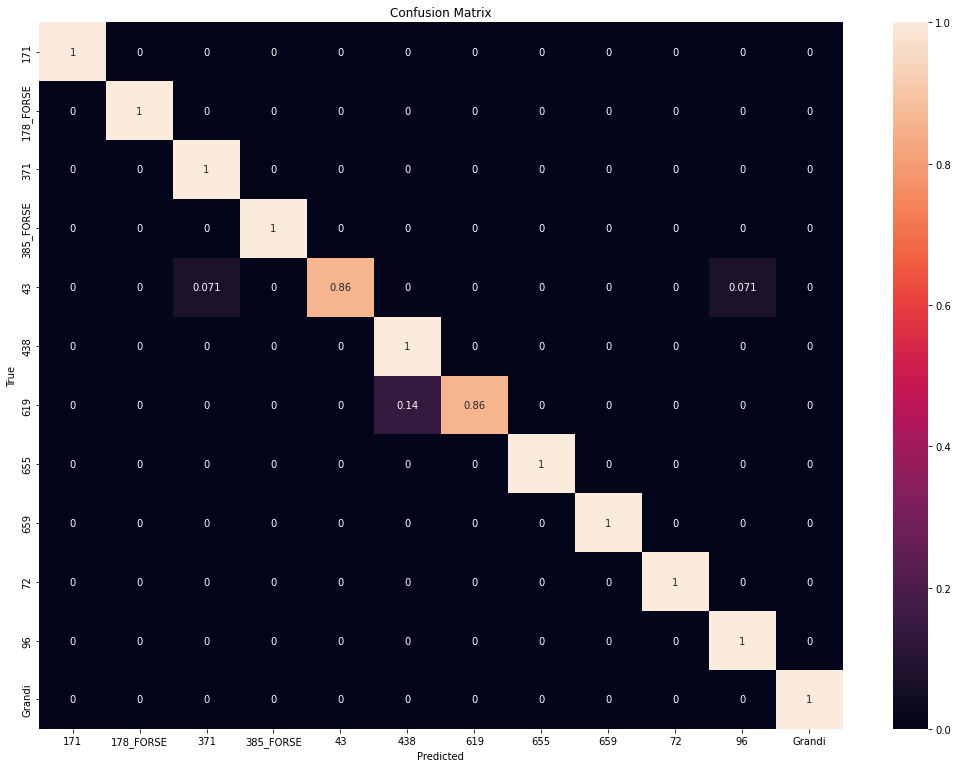

In [32]:
pltu.plotConfusionMatrix(cm, labels, "confusion_matrix_2", "images_point_four/")